### Neural Networks
* Many inputs, most often one output
* Linear Regression as a Neural Net Visualized
    * Univariate Regression
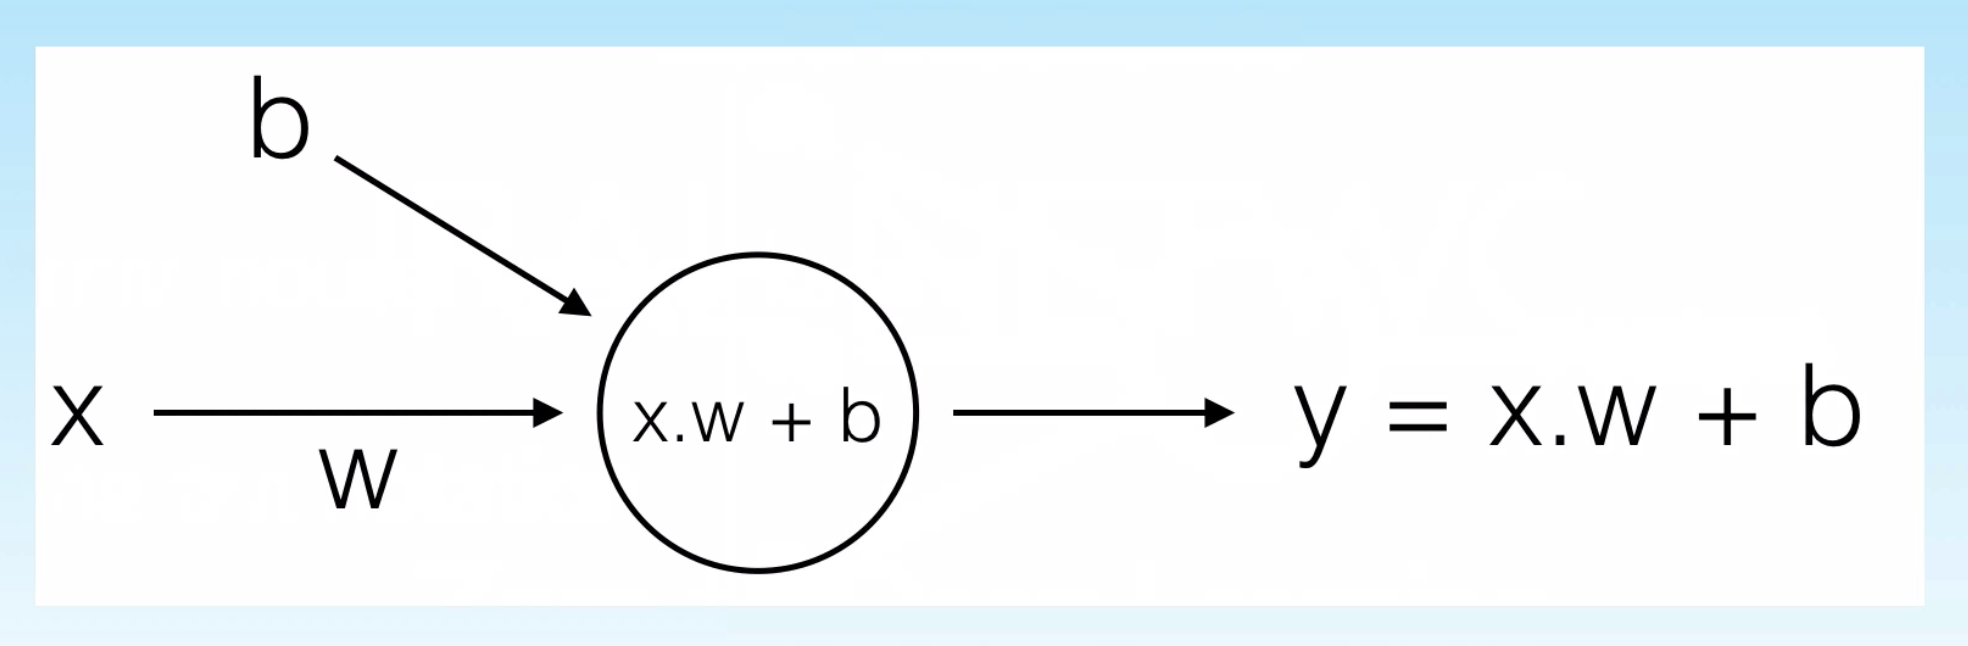
    * Multivariate Regression
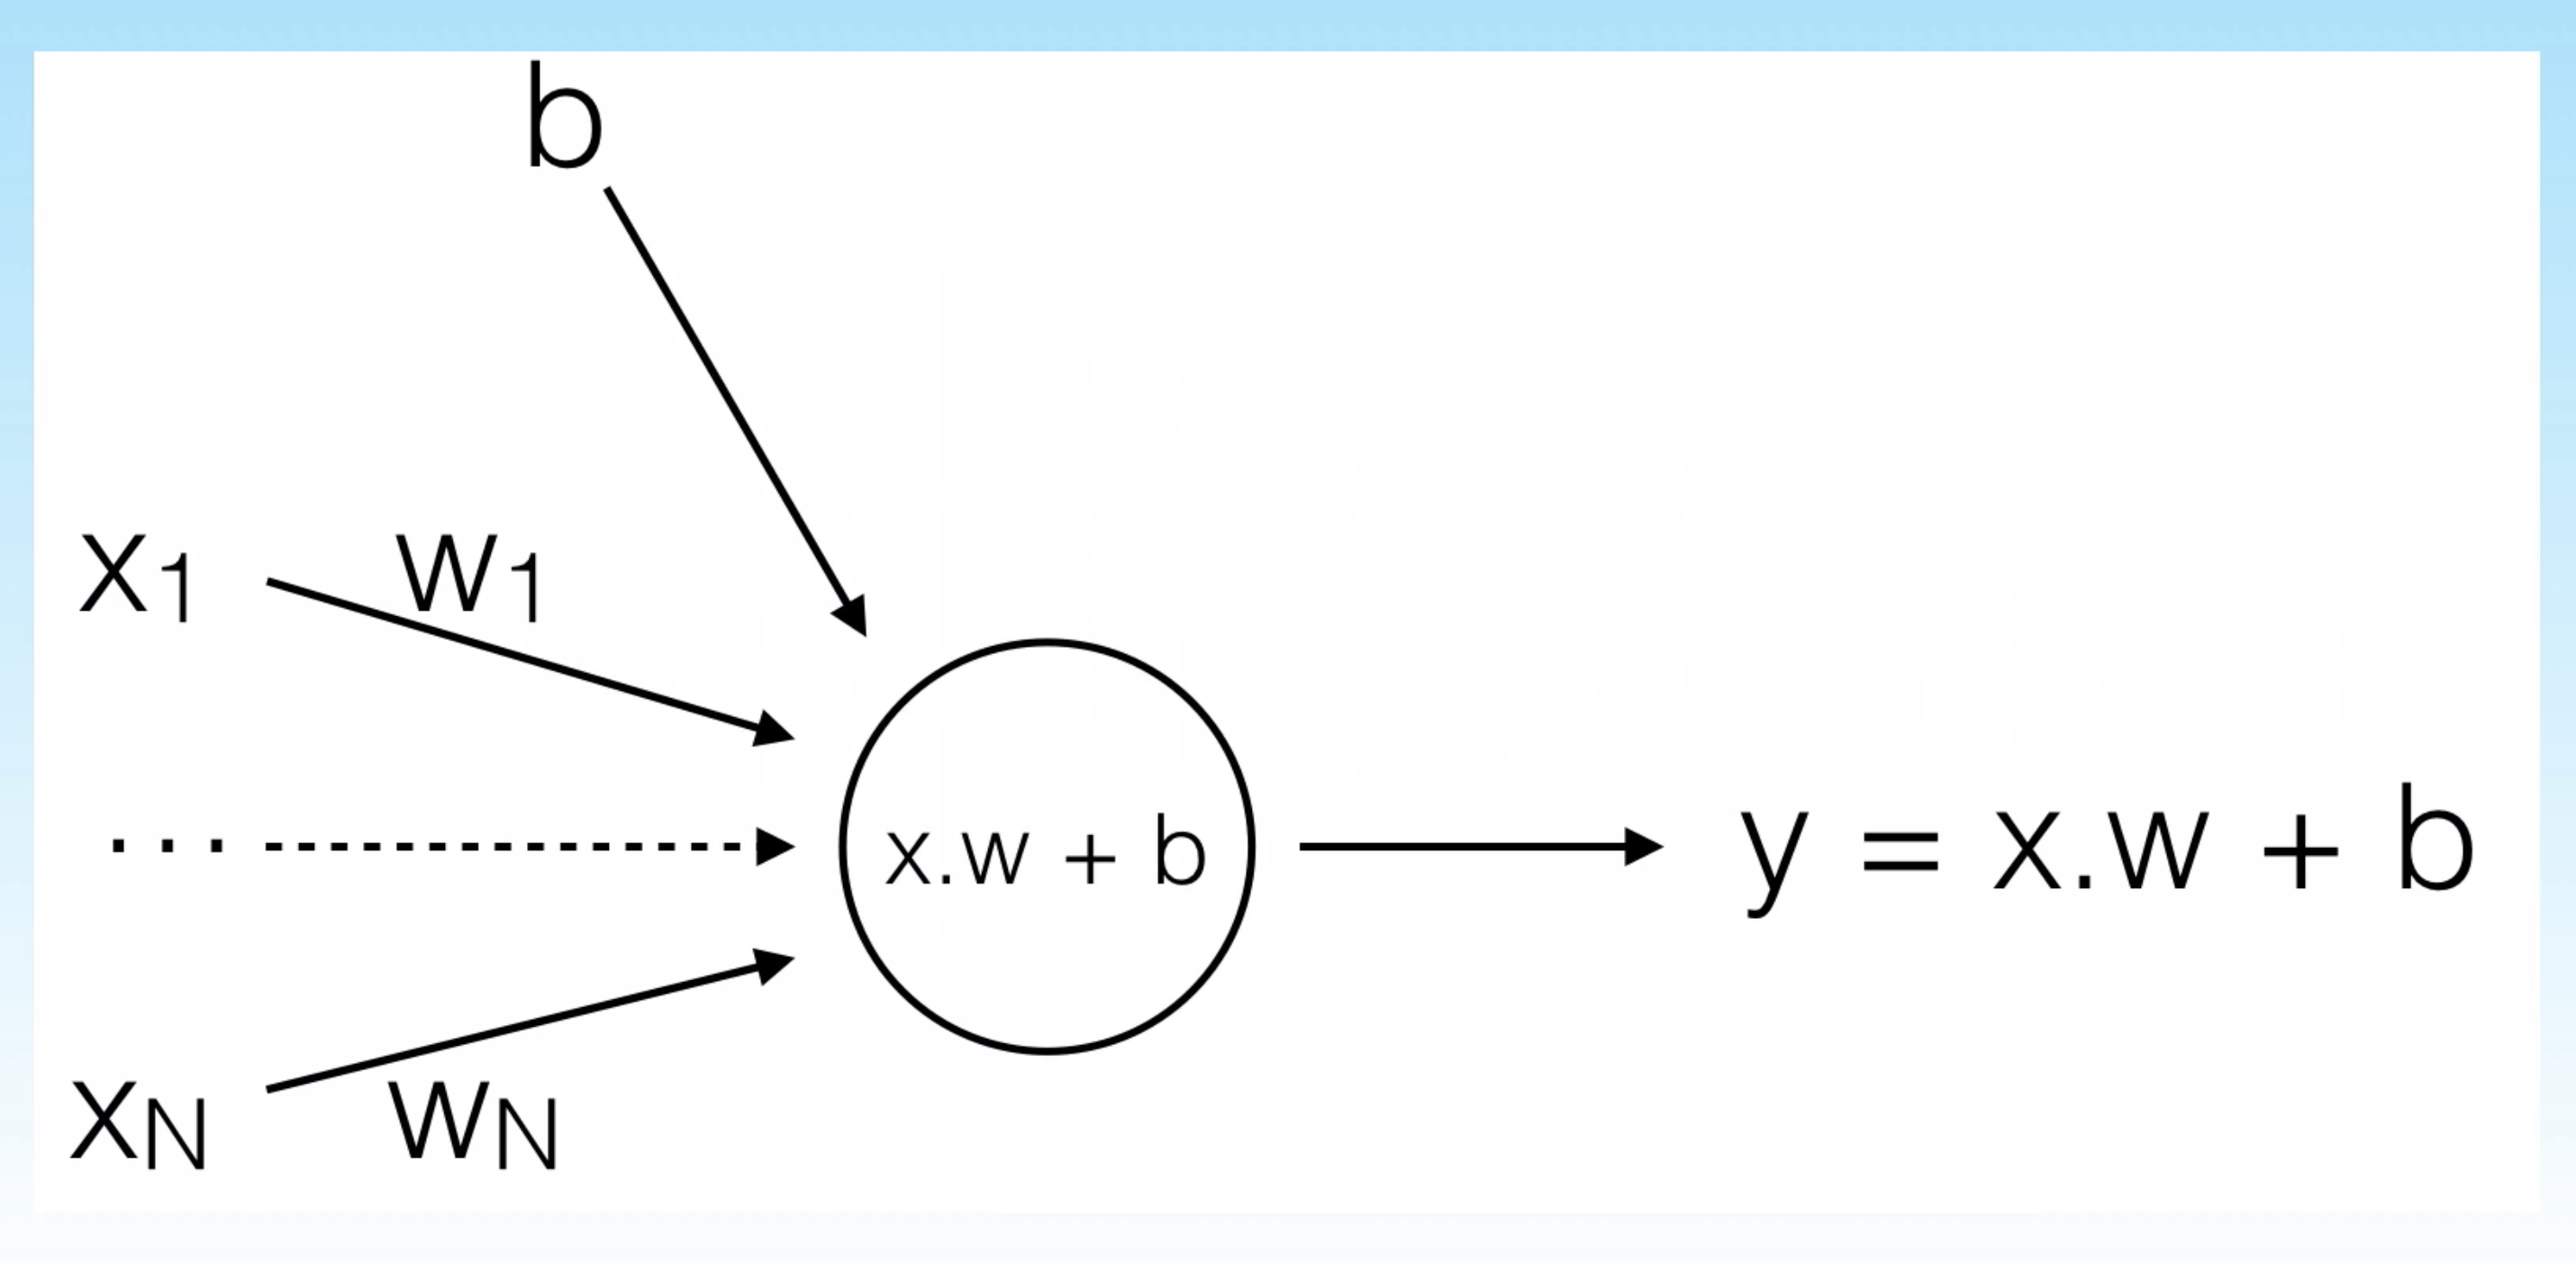

* Logistic Regression as Neural Net Visualized
    * Binary Outcome
    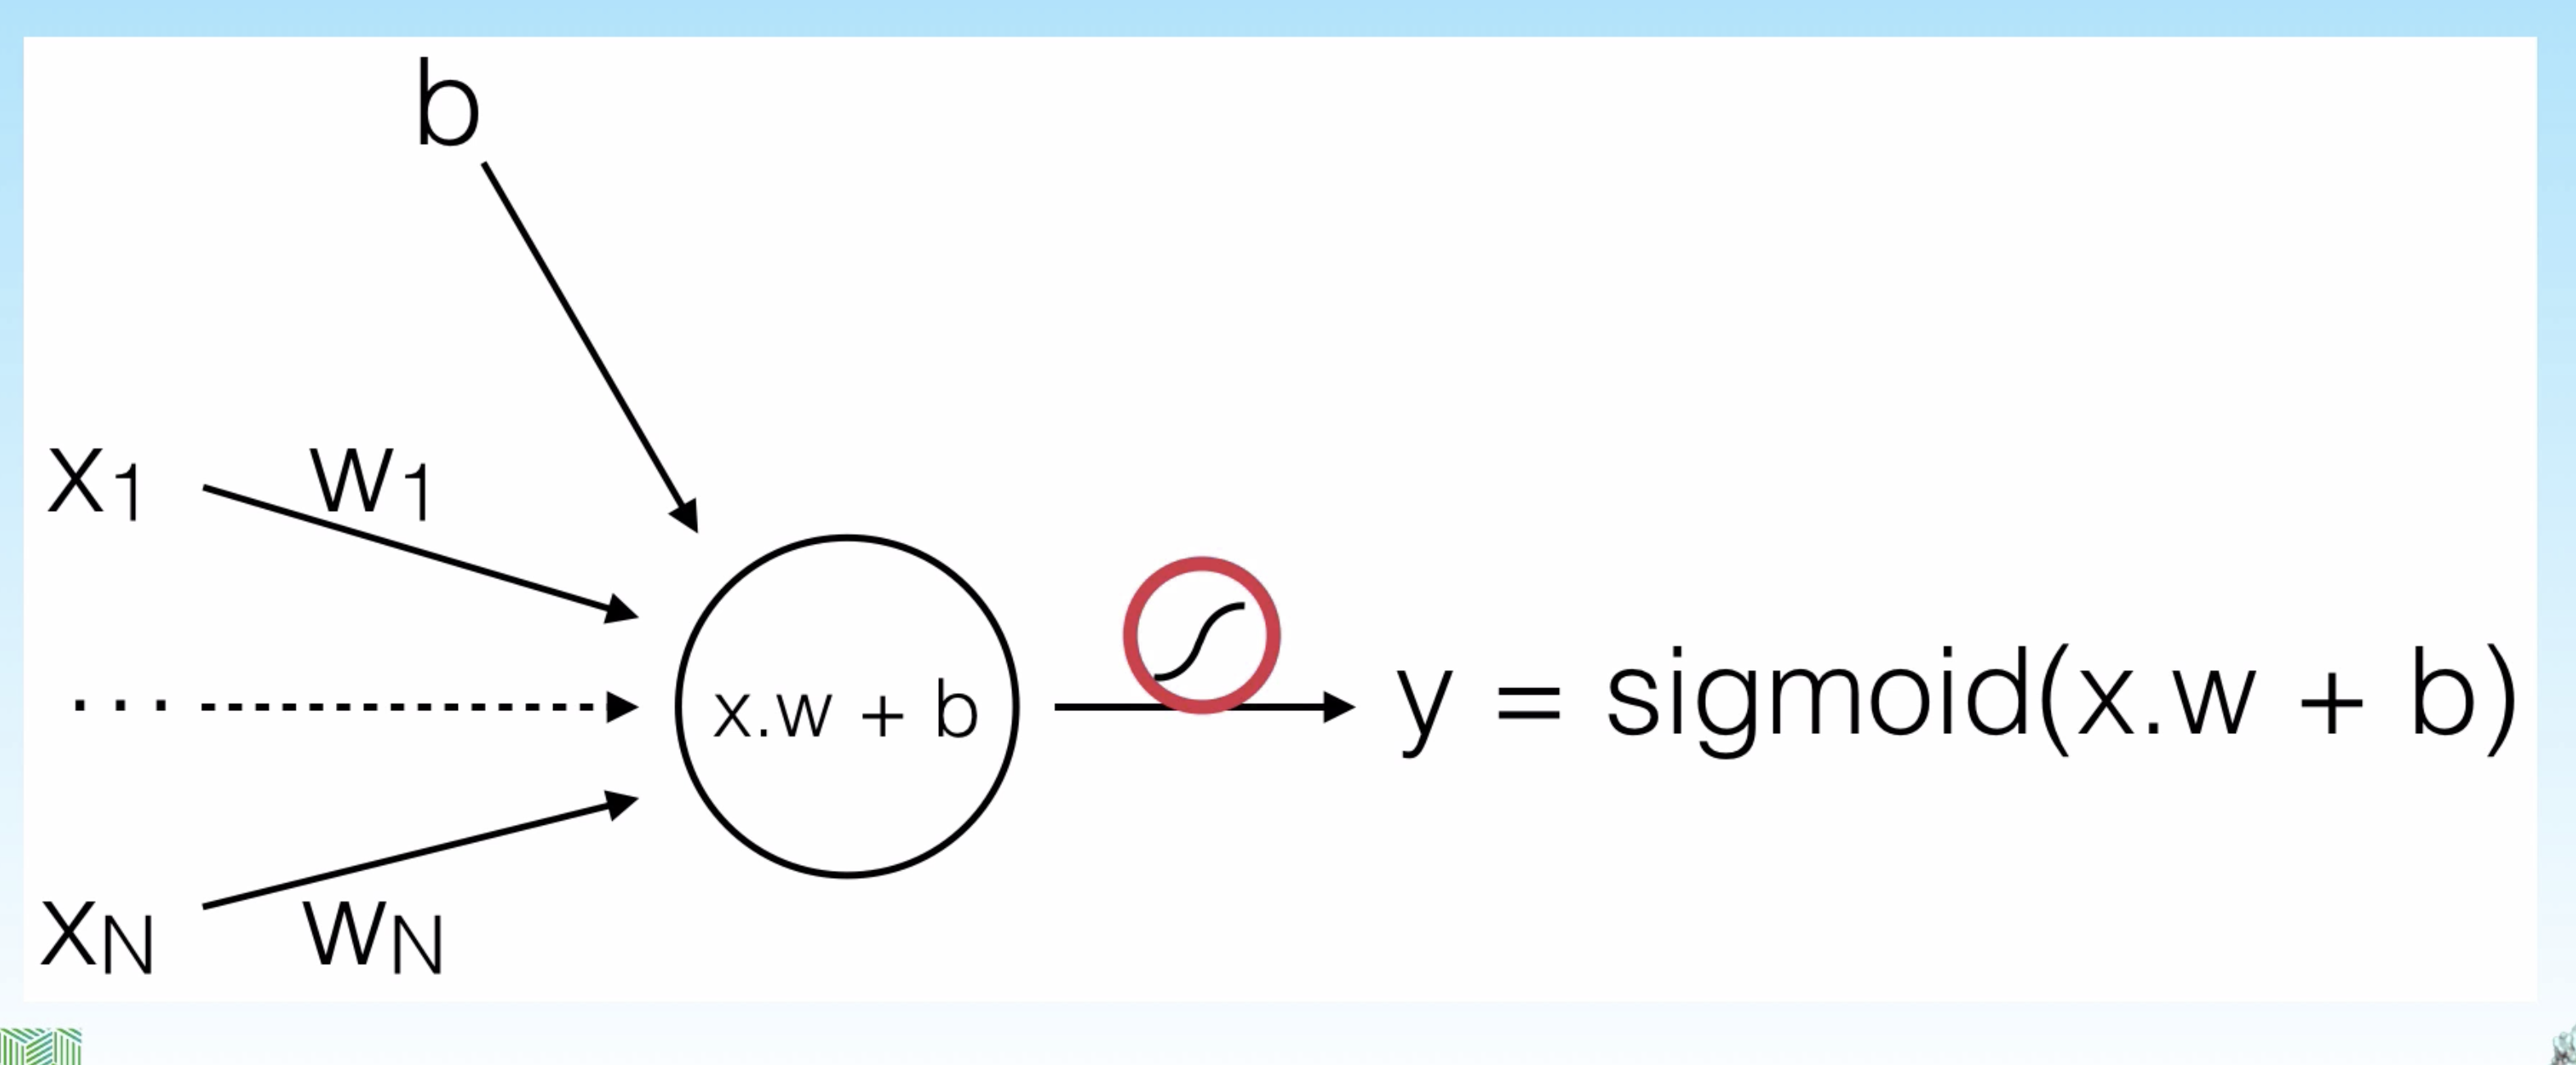
    
* A Perceptron was the first "Neural Net"
    * Perceptrons used "Step-Function" activation to satisfy activation of the output values This is shown in red below. 
    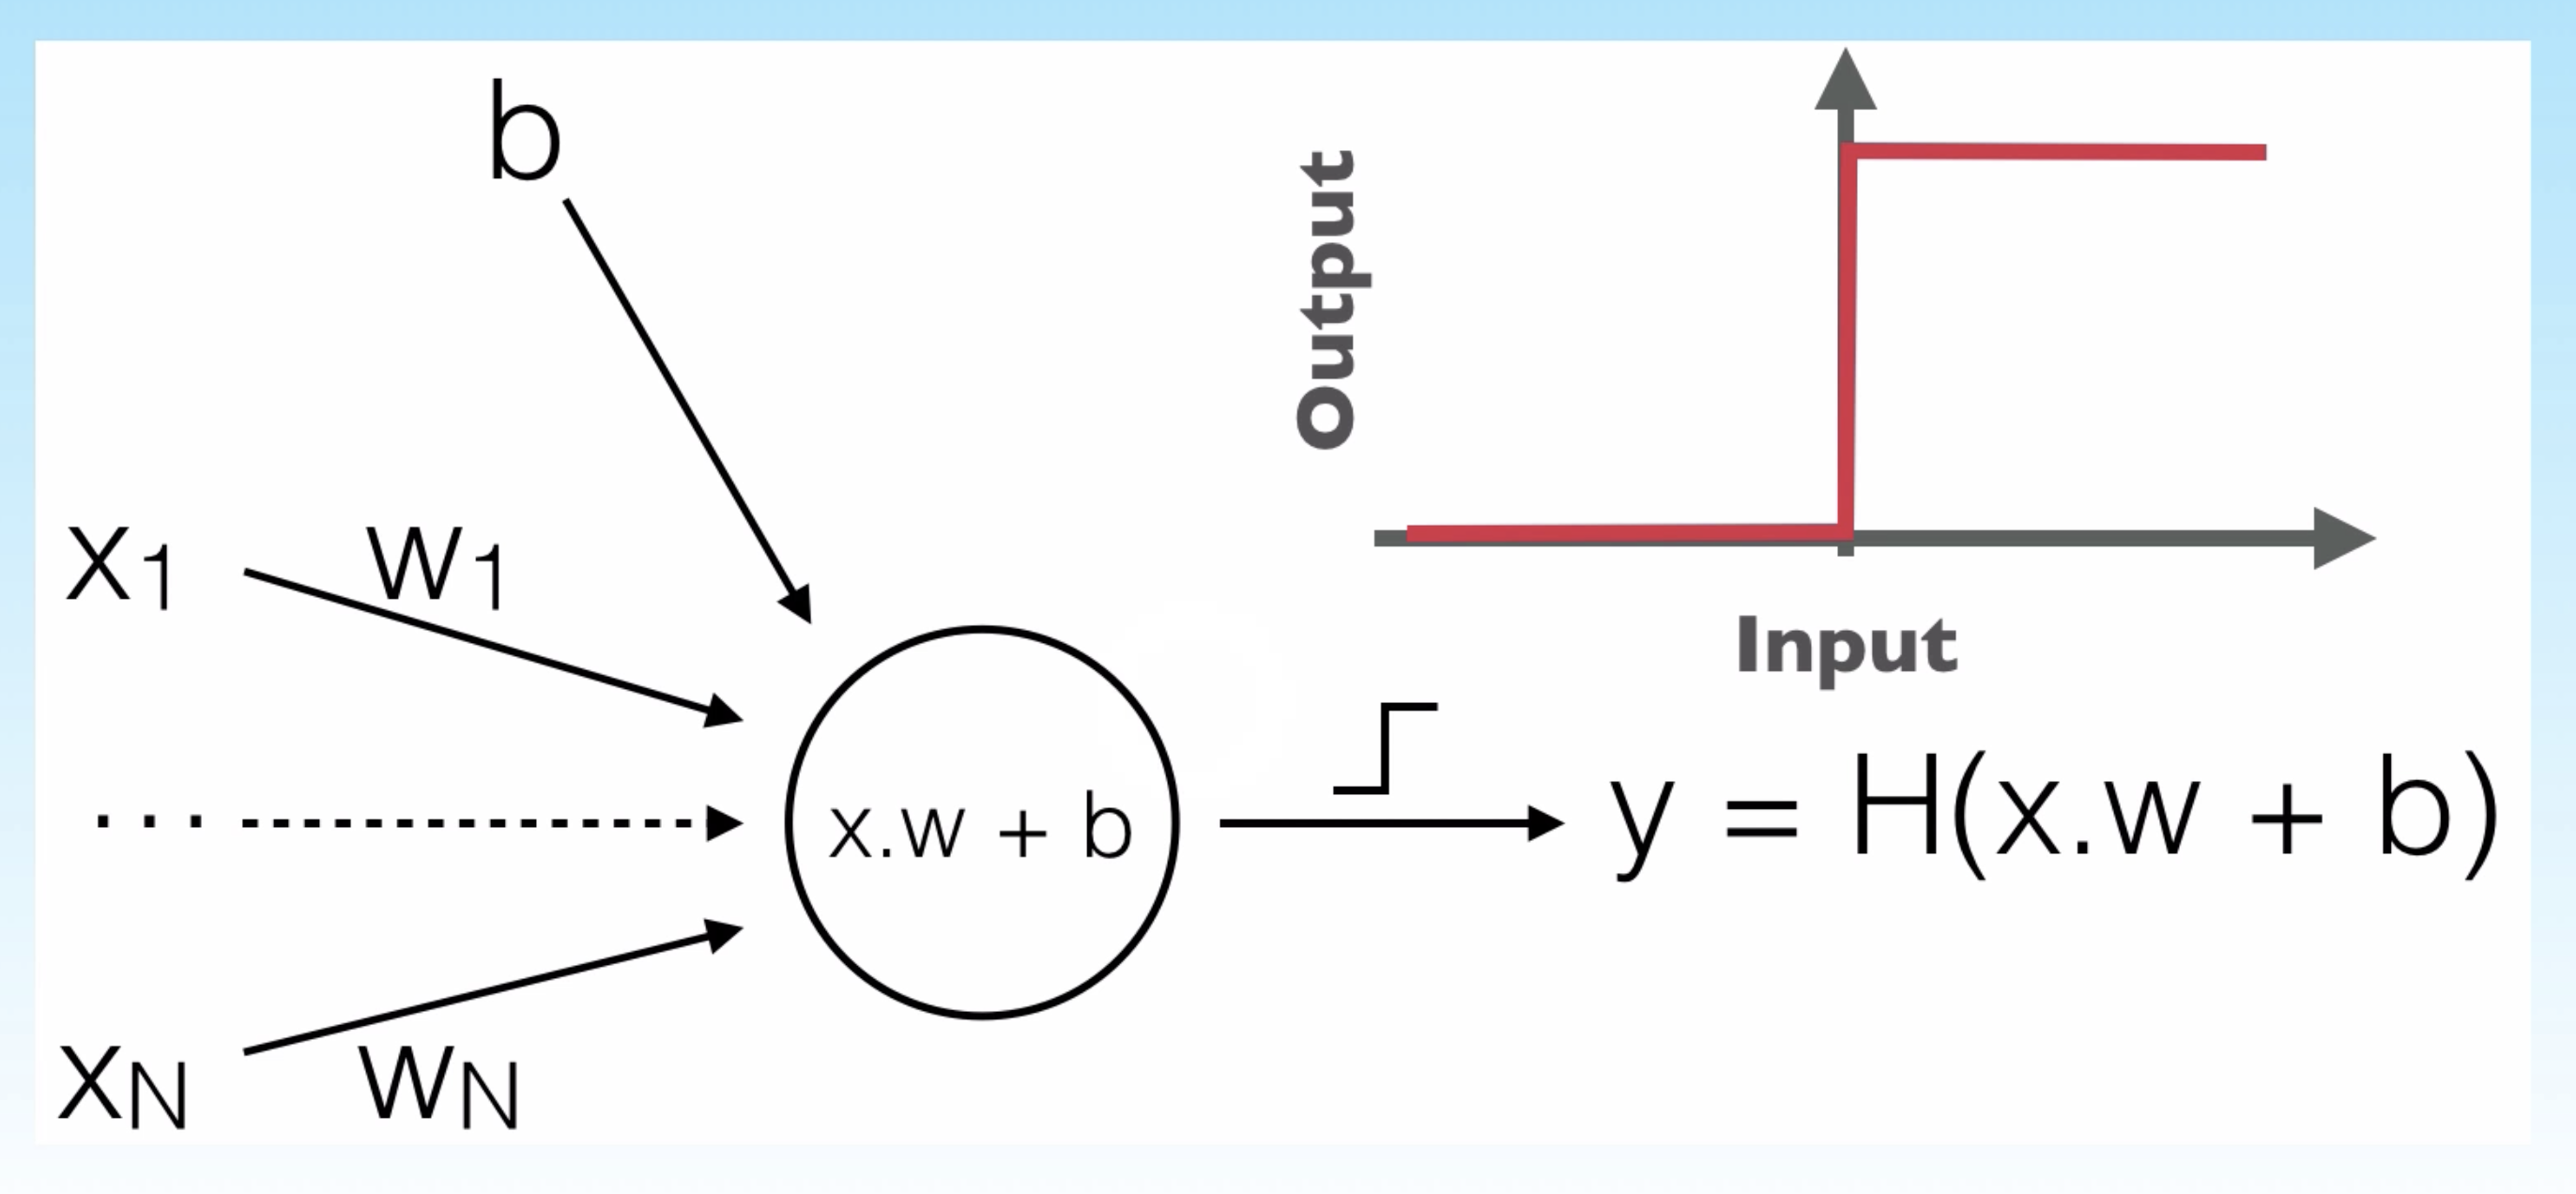
    
    * Perceptron with simpler notation:
    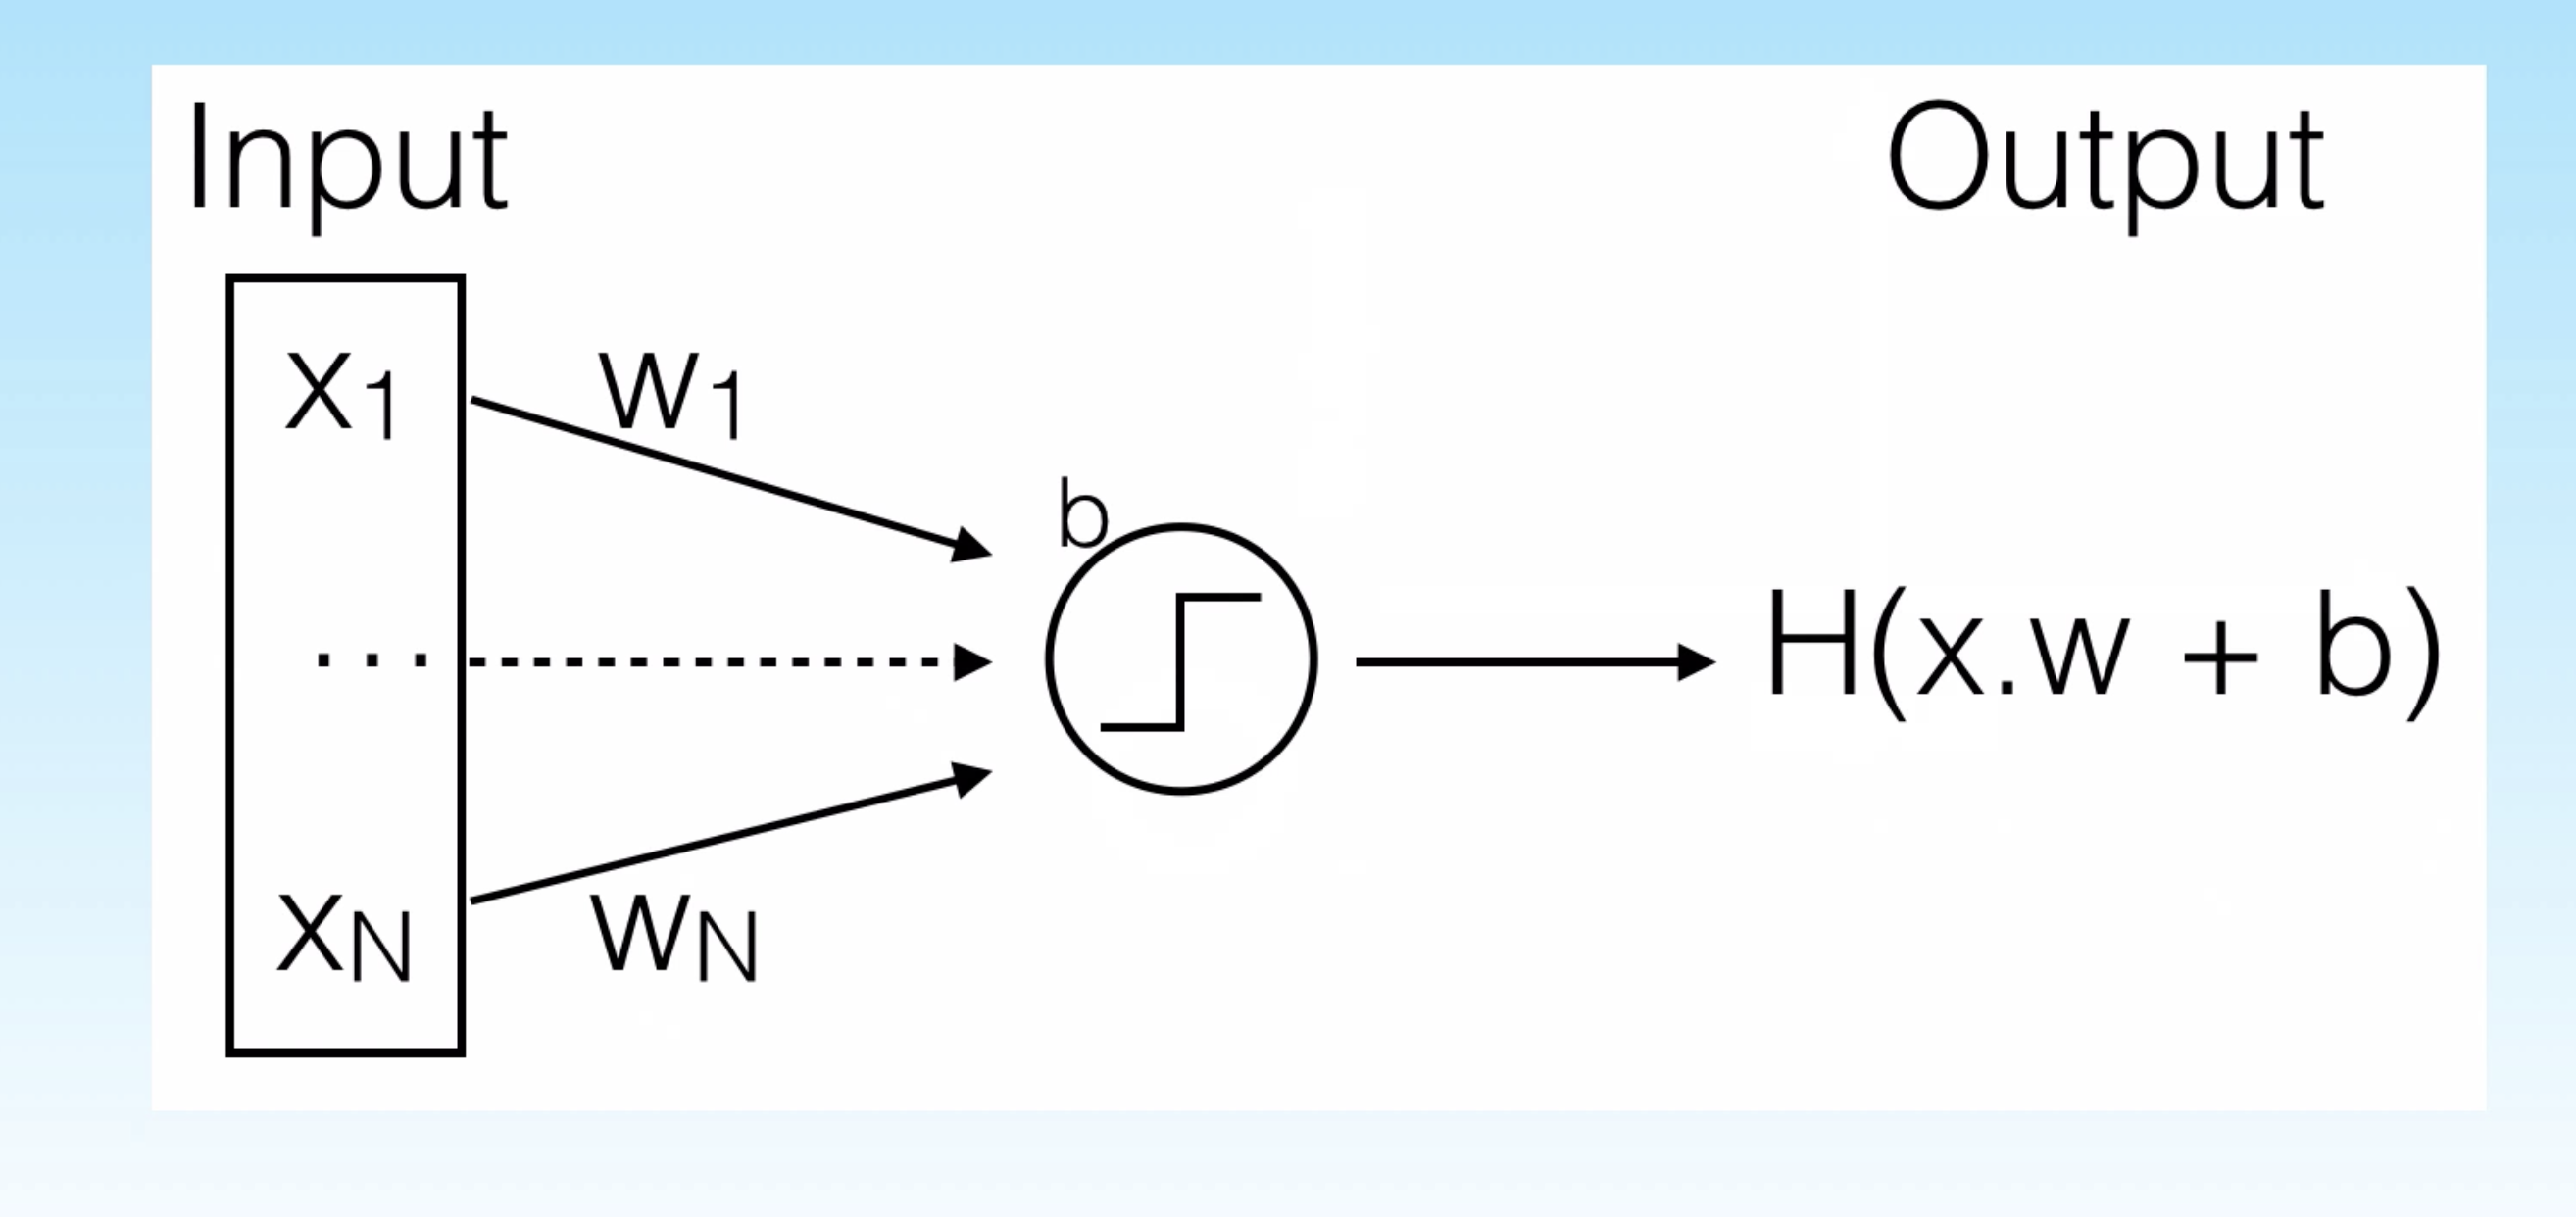
    
### Deep Neural Networks

* The "Deep" here relates to any network with more than a single node layer. The visualization below displays this.
    * Each layer performs the same operation
    * This is a fully connected NN, "multi-layer perceptron"
        * Due to all layers being connected to one another. 
    * Good for linear and non-linear calculations
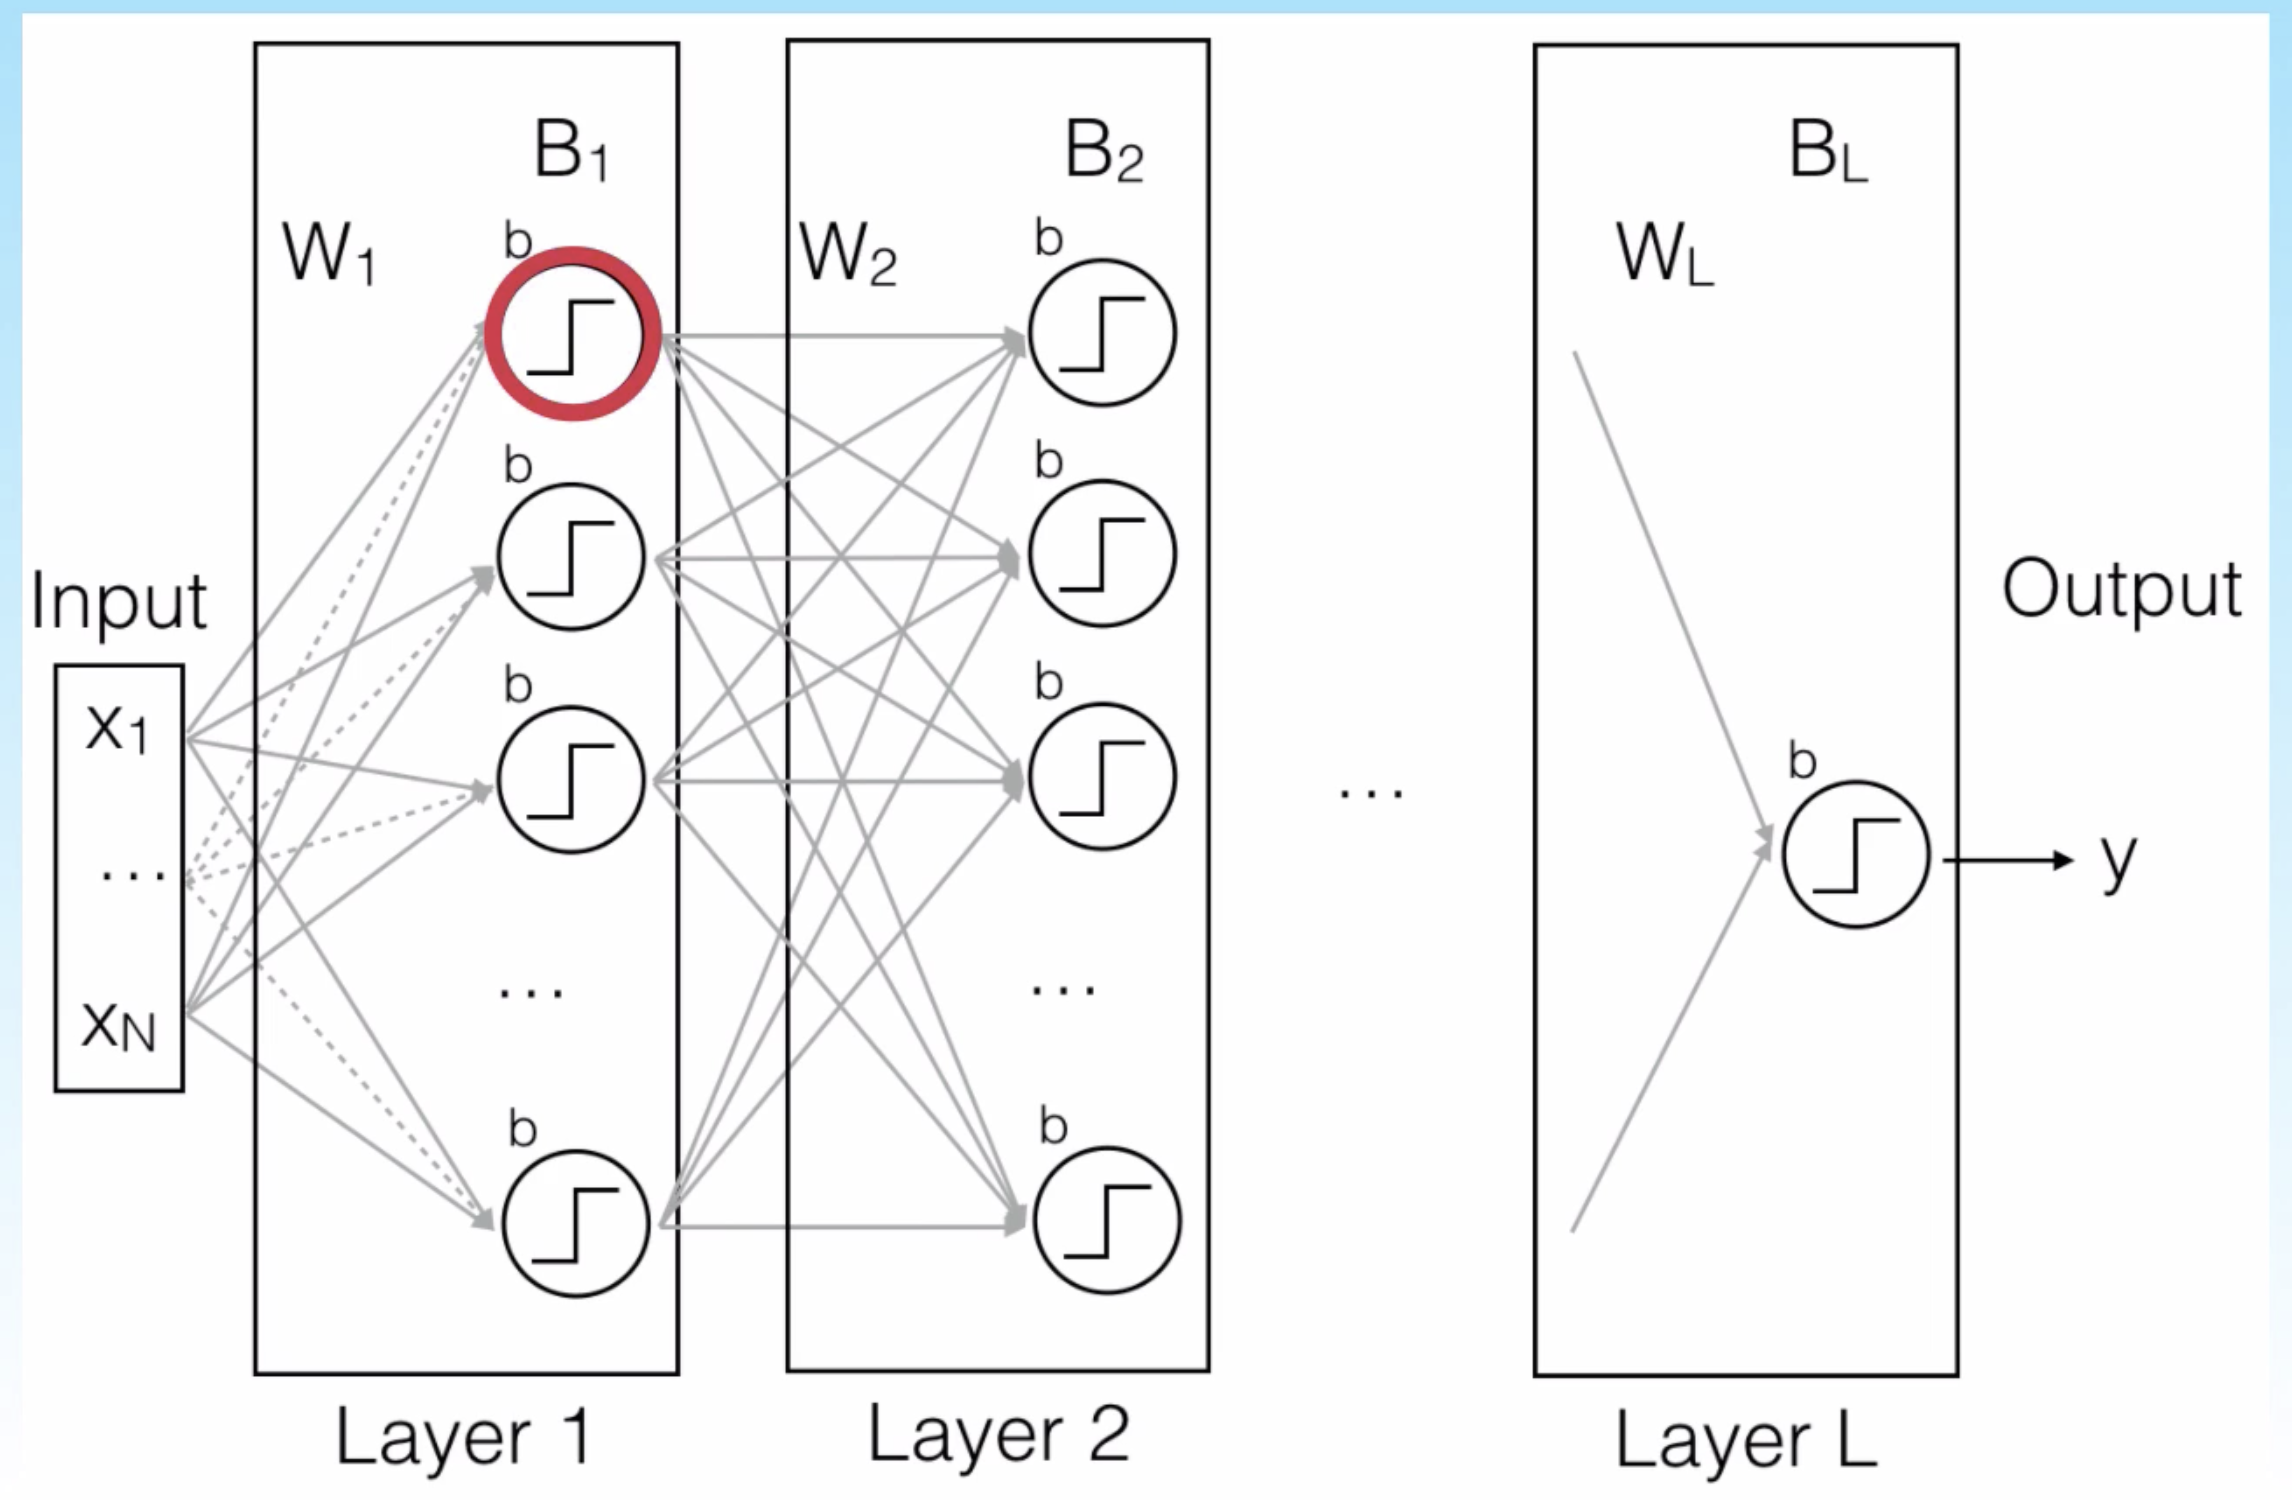
* This is the function representing a single layer:
    * i.e. X product Weight 1 + bias 1
    * The bias is a vector with length equal to the number of nodes in a layer
    * The output of the layer comes after the activation function has been satisfied|
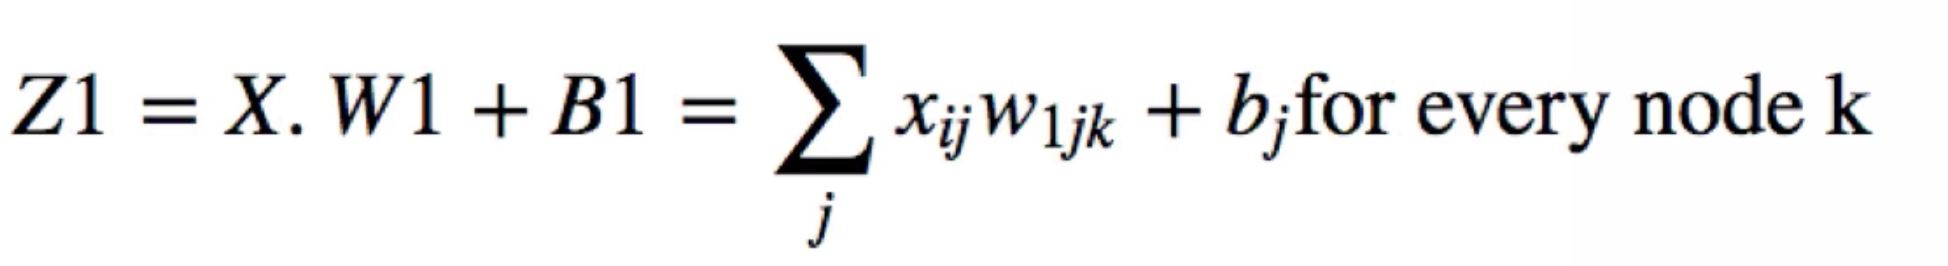
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

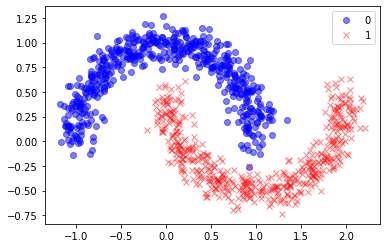

In [2]:
from sklearn.datasets import make_moons
# Creating linearly unseperable data
X, y= make_moons(n_samples=1000,noise =0.1, random_state=0)
plt.plot(X[y==0,0],X[y==0,1],'ob',alpha=.5)
plt.plot(X[y==1,0],X[y==1,1],'xr',alpha=.5)
plt.legend(['0','1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))
model.compile(Adam(lr=.05),'binary_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(X_train,y_train,epochs=200,verbose=0)

In [9]:
results = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 572us/step - loss: 0.3179 - accuracy: 0.8467


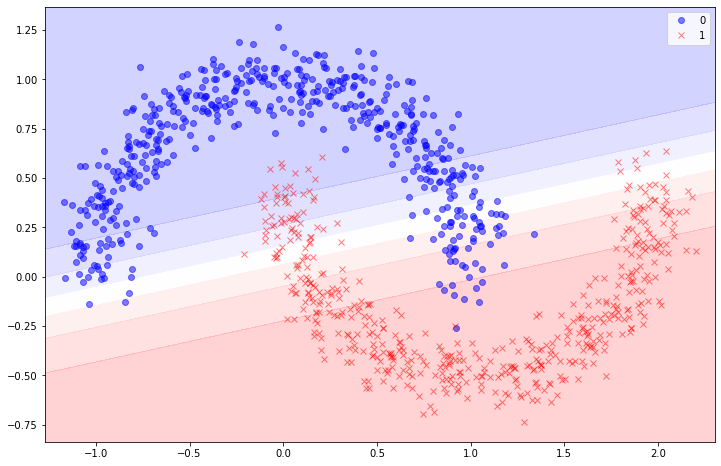

In [10]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

* This model is doing well when measuring "Accuracy", but as we can see it is generally misclassifying many points. The model is essentiall just splitting half of all observations into each respective bucket. Not very useful.

### Deep Model

In [11]:
model = Sequential()
# The initial valuse of each layer are the number of nodes in each layer
model.add(Dense(4,input_shape=(2,),activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.compile(Adam(lr=.05),'binary_crossentropy',metrics=['accuracy'])


model.fit(X_train,y_train,epochs=200,verbose=0)
results = model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 682us/step - loss: 0.0024 - accuracy: 1.0000


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
y_test_pred = model.predict_classes(X_test)

accuracy_score(y_test_pred,y_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


1.0

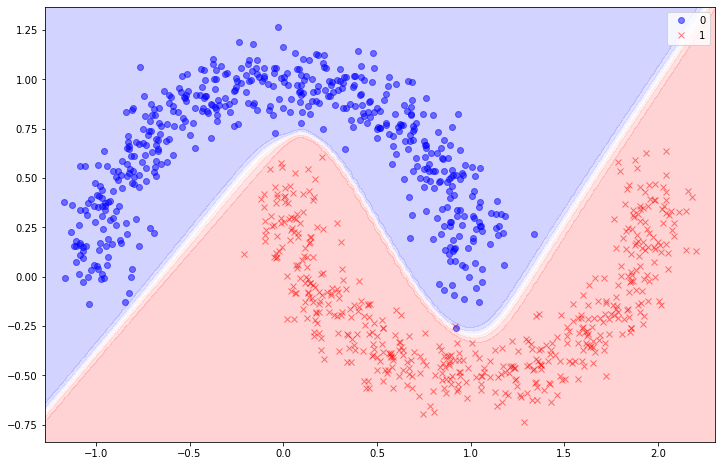

In [14]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

* The model now understands the entire structure of the data at hand and nearly classifies all observations correctly. This is rather impressive. With only three layers we are able to build a model that can predict these cresent moon shapes by only seeing where they land. 
* This model is of course not impactful in ways beyond just seeing where data lands. There are no other variables to work with other than the inputs and outputs of each layer. Nonetheless, this is impressive. 

* **Activation functions were not discussed at this point in the course.**

### Multiple Outputs
* Vector Regression
    * This activity relates to mulitple outputs. A good example is self driving cars, where the vehicle must understand how fast to go, what direction, are they turning, etc.
    * This works by each layer output is provided in a vector. 
* Classification
    * There are two cases:
        * Mutually Exclusive Classes
            * Similar to folders, where only one folder may exist
            * Outputs should be dummied (rows, not columns) and only have one value accross the row. 
            * The output of this case is different than the following. Here we need to ensure the observation value is determined to not have any chance of being another class.
                * The **SoftMax** Function works here:
                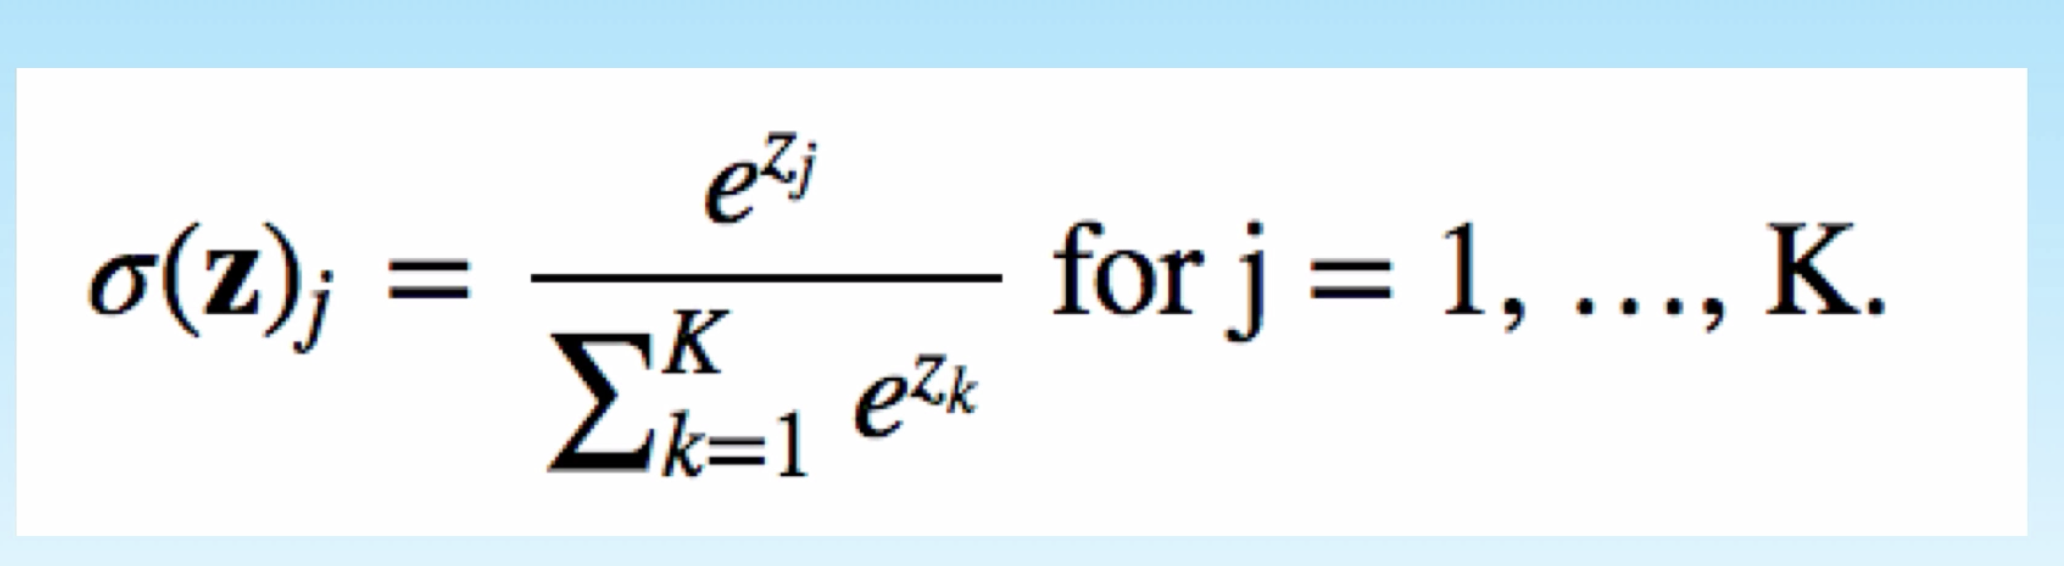
                    * This function takes the output of the last layer transforms it into a vector of the same length. Whose components are the exponentials of the original output, normalized by such exponentials. The sum of the components always adds up to 1. 
        * Non-Exclusive Classes
            * Similar to document tags, EX: Work, photo or work, document
            * Outputs should also be dummied, but can also have multiple values per row
            * Values should be normalized to be 0-1
                * This requires a **Sigmoid activation function** at the last layer
                
            

In [15]:
df=pd.read_csv('data/iris.csv')

In [16]:
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

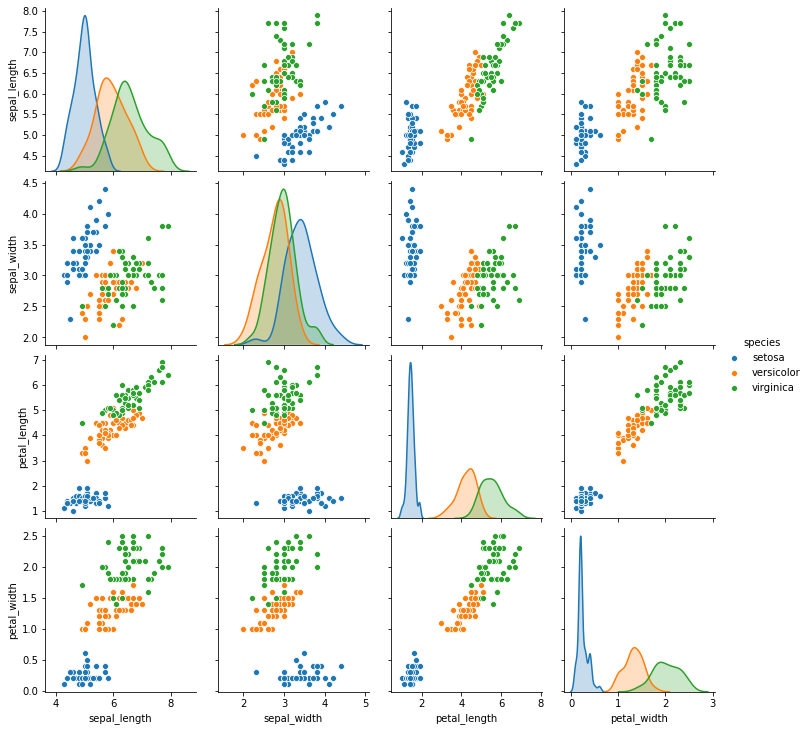

In [17]:
import seaborn as sns

sns.pairplot(df,hue="species")

In [18]:
X = df.drop('species',axis=1)

In [19]:
X

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [20]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
target_dict = {n:i for i,n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [22]:
y = df['species'].map(target_dict)
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [23]:
from keras.utils.np_utils import to_categorical # Pretty Neat

In [24]:
y_cat=to_categorical(y)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y_cat,test_size=.2)

### Shallow Model

In [26]:
model=Sequential()
model.add(Dense(3,input_shape=(4,),activation='softmax'))
model.compile(Adam(lr=.1),
              loss='categorical_crossentropy', # Goes with softmax
              metrics='accuracy')

In [27]:
model.fit(X_train,y_train,epochs=20,
          validation_split=.1, # 10% of the training data is left out to act as a "test" set for the model.
          verbose=0)

In [28]:
y_pred = model.predict(X_test)

In [29]:
np.set_printoptions(suppress=True) # Suppresses scientific notation
np.round(y_pred,5)

# The output represents the probabiliyt of each class

array([[0.02475, 0.60361, 0.37164],
       [0.00048, 0.17453, 0.825  ],
       [0.01798, 0.39491, 0.58711],
       [0.97279, 0.02677, 0.00044],
       [0.05338, 0.66873, 0.27789],
       [0.00187, 0.30509, 0.69304],
       [0.94457, 0.05411, 0.00132],
       [0.00258, 0.28365, 0.71376],
       [0.09658, 0.68006, 0.22336],
       [0.00023, 0.2121 , 0.78767],
       [0.01837, 0.43803, 0.5436 ],
       [0.04032, 0.70156, 0.25812],
       [0.00024, 0.20279, 0.79697],
       [0.00045, 0.25743, 0.74212],
       [0.92427, 0.0734 , 0.00233],
       [0.94195, 0.05685, 0.0012 ],
       [0.00378, 0.44407, 0.55215],
       [0.00083, 0.25645, 0.74271],
       [0.94352, 0.05516, 0.00132],
       [0.05217, 0.56855, 0.37928],
       [0.00335, 0.29301, 0.70363],
       [0.00074, 0.20622, 0.79304],
       [0.00033, 0.19889, 0.80078],
       [0.02354, 0.53214, 0.44431],
       [0.05625, 0.65834, 0.28541],
       [0.0138 , 0.66917, 0.31703],
       [0.00149, 0.26844, 0.73007],
       [0.02703, 0.68686, 0.

In [30]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print(y_test_class)
print(y_pred_class)

[1 2 1 0 1 2 0 2 1 2 1 1 2 2 0 0 2 2 0 1 2 2 2 1 1 1 2 1 1 0]
[1 2 2 0 1 2 0 2 1 2 2 1 2 2 0 0 2 2 0 1 2 2 2 1 1 1 2 1 1 0]


In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [33]:
def pretty_confusion_matrix(y_true,y_pred,labels =['False','True']):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index=labels,columns=pred_labels)
    return df

In [34]:
pretty_confusion_matrix(y_test_class,y_pred_class,df['species'].unique())

Predicted setosa  Predicted versicolor  Predicted virginica
setosa                     6                     0                    0
versicolor                 0                    10                    2
virginica                  0                     0                   12